# Libraries

In [1]:
import os 
from PIL import Image

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For K-means clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

# For random forest


# For CNN

# import torch
# import torch.nn as nn
# import torch.nn.functional as F 
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader

# # For classification and testing accuracy

    
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

# Data

In [2]:
# dirname = '/Users/shauntan2/Documents/Imperial College/Term 2/Machine Learning/ML_Project/data/Kather_texture_2016_image_tiles_5000/01_TUMOR'
folderpath = '/Users/shauntan2/Documents/Imperial College/Term 2/Machine Learning/ML_Project/data/Kather_texture_2016_image_tiles_5000'
final = []
for i in os.listdir(folderpath):
    if not i.startswith('.'): # To ignore hidden files
        print(i)
        for fname in os.listdir(os.path.join(folderpath, i)):
            im = Image.open(os.path.join(folderpath, i, fname))
            imarray = np.array(im)
            final.append(imarray)

final = np.asarray(final)
final

02_STROMA
06_MUCOSA
05_DEBRIS
01_TUMOR
03_COMPLEX
08_EMPTY
04_LYMPHO
07_ADIPOSE


array([[[[132,  37,  75],
         [124,  37,  66],
         [121,  34,  63],
         ...,
         [183,  88, 126],
         [167,  72, 110],
         [163,  67, 112]],

        [[134,  36,  69],
         [103,  24,  61],
         [105,  26,  63],
         ...,
         [170,  78, 117],
         [183,  91, 130],
         [177,  84, 128]],

        [[145,  44,  72],
         [110,  35,  76],
         [105,  30,  71],
         ...,
         [160,  70, 106],
         [177,  87, 123],
         [157,  62, 100]],

        ...,

        [[153,  35,  55],
         [133,  25,  57],
         [152,  44,  76],
         ...,
         [142,  34,  65],
         [144,  36,  67],
         [133,  28,  68]],

        [[146,  34,  56],
         [140,  32,  56],
         [153,  45,  69],
         ...,
         [159,  41,  65],
         [161,  43,  67],
         [127,  27,  71]],

        [[158,  41,  67],
         [131,  33,  54],
         [137,  39,  60],
         ...,
         [177,  46,  72],
        

In [3]:
final.shape # Checking the number of arrays and shape, should be 5000, 150px x 150px

(5000, 150, 150, 3)

In [4]:
print(final.min())
final.shape[0]

0


5000

In [9]:
print(final.max())

255


In [10]:
# To save the images data as arrays as a separate file
np.save('/Users/shauntan2/Documents/Imperial College/Term 2/Machine Learning/ML_Project/data/crc_images_array', final)

# Unsupervised Method: K-Means Clustering

In [5]:
# Reshape data for clustering
# Clustering of images require it to be 2D arrays
final_clustering = np.reshape(final, (final.shape[0], -1))
final_clustering.shape

(5000, 67500)

In [6]:
# Data Normalisation
final_clustering_standard = StandardScaler().fit_transform(final_clustering)

Text(0.5, 1.0, 'Clustering of CRC images data')

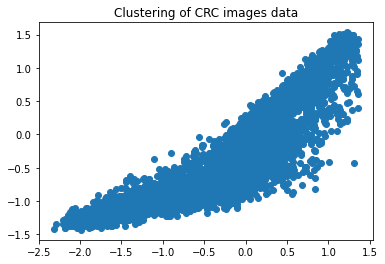

In [7]:
# Plotting the data from the images array data
plt.scatter(final_clustering_standard[:, 0], final_clustering_standard[:, 1])
plt.title("Clustering of CRC images data")

In [20]:
## Check which number of clusters works best 
n_cluster_list = [4,5,6,7,8,9,10,11,15,20] # there can't be more clusters as n

elbow = []
ss = []
for n_clusters in n_cluster_list:
   #iterating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(final_clustering_standard)
    #Finding the average silhouette score
    silhouette_avg = metrics.silhouette_score(final_clustering_standard, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    #Finding the average SSE"
    elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

For n_clusters = 6 The average silhouette_score is : 0.030072942567315773
For n_clusters = 7 The average silhouette_score is : 0.028956195663046424
For n_clusters = 8 The average silhouette_score is : 0.04804625422451934


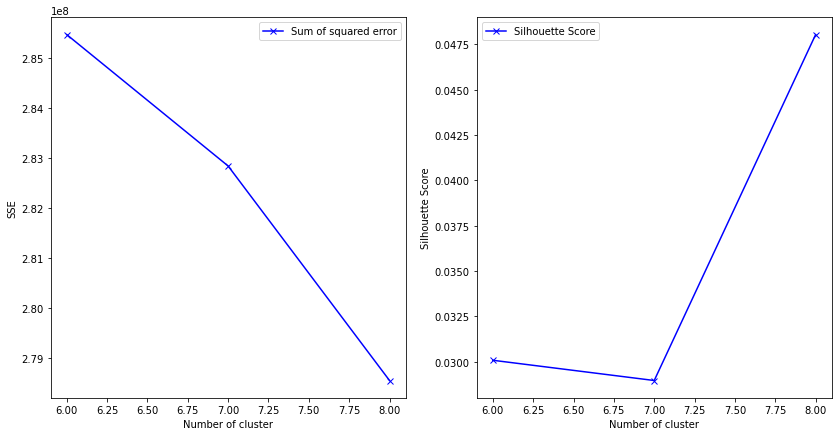

In [23]:
# Plotting silhouette score and elbow method
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(n_cluster_list, elbow,'bx-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(n_cluster_list, ss,'bx-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()
plt.savefig('silhouette_score_elbow.pdf')

In [8]:
# Using a cluster of 8
kmeans = KMeans(n_clusters = 8, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(final_clustering_standard)
print('Done')

Done


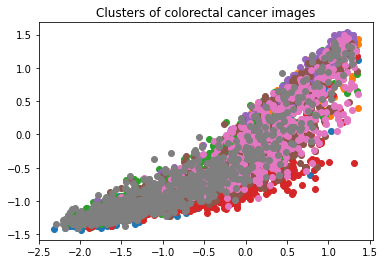

<Figure size 432x288 with 0 Axes>

In [15]:
# Plotting the results after clustering

u_labels = np.unique(y_kmeans)

#plotting the results:
 
for i in u_labels:
    plt.scatter(final_clustering_standard[y_kmeans == i , 0] , final_clustering_standard[y_kmeans == i , 1] , label = i)

# Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of colorectal cancer images')
plt.show()
plt.savefig('clustering_crc.pdf')

# Supervised Method: Random Forest

# Supervised Method: Convolutional Neural Network